In [1]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\KOGENTIX\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from pandas.core import datetools

In [3]:
# Source data https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html
df=pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/AirPassengers.csv")

In [4]:
df.head()

,Unnamed: 0,time,AirPassengers
0,1,1949.000000,112
1,2,1949.083333,118
2,3,1949.166667,132
3,4,1949.250000,129
4,5,1949.333333,121


In [5]:
df.head(13)

,Unnamed: 0,time,AirPassengers
0,1,1949.000000,112
1,2,1949.083333,118
2,3,1949.166667,132
3,4,1949.250000,129
4,5,1949.333333,121
5,6,1949.416667,135
6,7,1949.500000,148
7,8,1949.583333,148
8,9,1949.666667,136
9,10,1949.750000,119


In [7]:
df.tail(13)

,Unnamed: 0,time,AirPassengers
131,132,1959.916667,405
132,133,1960.000000,417
133,134,1960.083333,391
134,135,1960.166667,419
135,136,1960.250000,461
136,137,1960.333333,472
137,138,1960.416667,535
138,139,1960.500000,622
139,140,1960.583333,606
140,141,1960.666667,508


In [9]:
start = datetime.datetime.strptime("1949-01-01", "%Y-%m-%d")
type(start)

datetime.datetime

In [10]:
print(start)

1949-01-01 00:00:00


In [12]:
len(df)

144

In [13]:
date_list = [start + relativedelta(months=x) for x in range(0,df.shape[0])]


In [15]:
print(date_list[0:4])

[datetime.datetime(1949, 1, 1, 0, 0), datetime.datetime(1949, 2, 1, 0, 0), datetime.datetime(1949, 3, 1, 0, 0), datetime.datetime(1949, 4, 1, 0, 0)]


In [21]:
for x in range(0,144):
    print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


In [19]:
date_list = [start + relativedelta(months=x) for x in range(0,len(df))]


In [22]:
date_list[140:144]

[datetime.datetime(1960, 9, 1, 0, 0),
 datetime.datetime(1960, 10, 1, 0, 0),
 datetime.datetime(1960, 11, 1, 0, 0),
 datetime.datetime(1960, 12, 1, 0, 0)]

In [17]:
df['index'] =date_list
df.set_index(['index'], inplace=True)
df.index.name=None

In [23]:
del df['Unnamed: 0']
del df['time']
df.head()

,AirPassengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
df.tail()

,AirPassengers
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [25]:
df['AirPassengers'] = df.AirPassengers.apply(lambda x: int(x)*1000)


In [26]:
df.head()

,AirPassengers
1949-01-01,112000
1949-02-01,118000
1949-03-01,132000
1949-04-01,129000
1949-05-01,121000


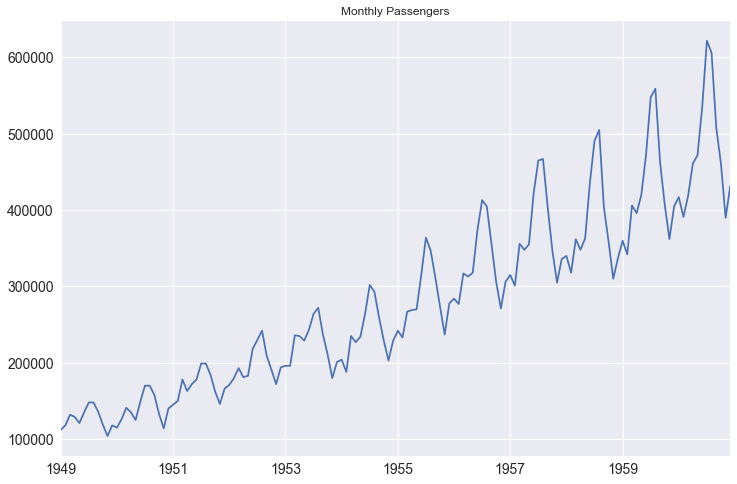

In [27]:
df.AirPassengers.plot(figsize=(12,8), title= 'Monthly Passengers', fontsize=14)
plt.savefig('month_ridership.png', bbox_inches='tight')

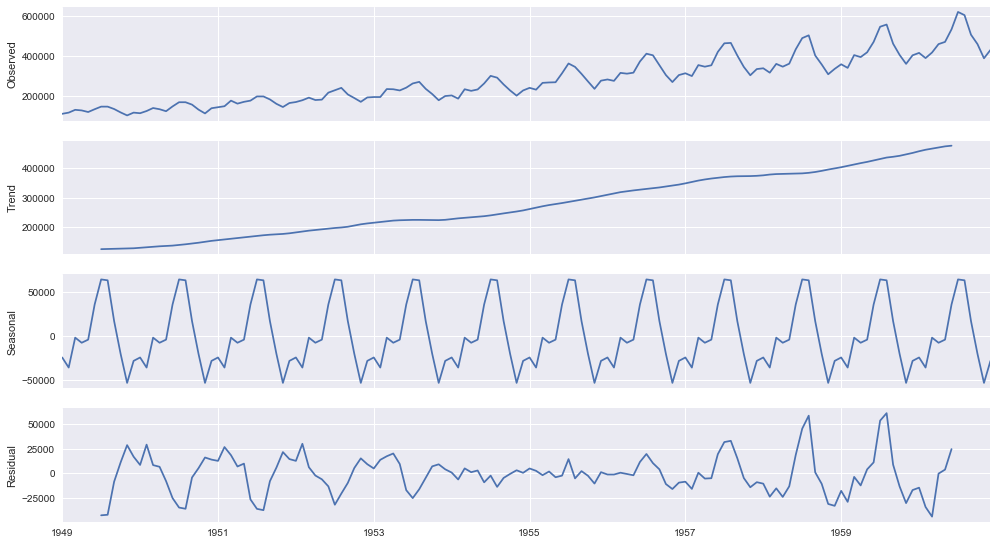

In [28]:
decomposition = seasonal_decompose(df.AirPassengers, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [29]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)
print(p)

range(0, 2)


In [30]:
import itertools
import warnings

In [31]:
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [32]:
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
y=df


In [34]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3618.0303990983703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2824.743996368423
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2942.2733127230185
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2922.17815113314
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2767.105066400224
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2691.2333986436743
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3890.8167777778344
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3541.1171284719767
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3028.8377323188806
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2746.7797312913585
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3583.5236406200975
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3531.2937768979236
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2781.198675746604
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2720.702308820595
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3029.089945668332
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2568.2832251220993
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2841.3157814595106
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2815.4011044132576

In [35]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
c3=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            c3.append( results.aic)
        except:
            continue

In [36]:
c3

[3618.0303990983703,
 2824.7439963684228,
 2942.2733127230185,
 2922.1781511331401,
 2767.1050664002241,
 2691.2333986436743,
 3890.8167777778344,
 3541.1171284719767,
 3028.8377323188806,
 2746.7797312913585,
 3583.5236406200975,
 3531.2937768979236,
 2781.1986757466038,
 2720.7023088205951,
 3029.0899456683319,
 2568.2832251220993,
 2841.3157814595106,
 2815.4011044132576,
 2588.5333865135872,
 2569.9453272483738,
 3327.5177587522303,
 2984.7167061123273,
 2789.1285421540424,
 2537.0293659293957,
 2984.4555708516423,
 2939.4609583744841,
 2578.7862352774441,
 2537.7714842292662,
 3391.5248913820797,
 3038.1420742813116,
 2839.8091922634489,
 2588.5036717518392,
 2993.4630440139713,
 2995.0492163269528,
 2588.246328431529,
 2592.8011050272398,
 3352.0350133621482,
 3006.5493366618912,
 2810.6423724894512,
 2559.5840319488525,
 2981.2250436795084,
 2959.3142304724843,
 2579.8245645892216,
 2563.1392258925748,
 3354.7462930846423,
 3006.7029976360013,
 2809.3844175191666,
 2558.48460276

In [37]:
import numpy as np
index_min = np.argmin(c3)

In [39]:
np.min(c3)

2537.0293659293957

In [38]:
index_min

23

In [40]:
c3[index_min]

2537.0293659293957

In [44]:

warnings.filterwarnings("ignore") # specify to ignore warning messages
c4=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3618.0303990983703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2824.743996368423
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2942.2733127230185
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2922.17815113314
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2767.105066400224
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2691.2333986436743
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3890.8167777778344
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3541.1171284719767
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3028.8377323188806
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2746.7797312913585
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3583.5236406200975
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3531.2937768979236
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2781.198675746604
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2720.702308820595
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3029.089945668332
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2568.2832251220993
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2841.3157814595106
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2815.4011044132576

In [46]:
c4[index_min]

'ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2537.0293659293957'

In [48]:

order1=c4[index_min][6:13]
order1

'0, 1, 1'

In [54]:
order1=[int(s) for s in order1.split(',')]
order1

[0, 1, 1]

In [49]:

seasonal_order1=c4[index_min][16:27]
seasonal_order1

'0, 1, 1, 12'

In [55]:
seasonal_order1=[int(s) for s in seasonal_order1.split(',')]
seasonal_order1

[0, 1, 1, 12]

In [56]:
from statsmodels.tsa.x13 import x13_arima_select_order


In [57]:
mod = sm.tsa.statespace.SARIMAX(df.AirPassengers, trend='n', order=order1, seasonal_order=seasonal_order1)


In [58]:
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      AirPassengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1413.963
Date:                            Wed, 13 Dec 2017   AIC                           2833.926
Time:                                    14:05:20   BIC                           2842.835
Sample:                                01-01-1949   HQIC                          2837.546
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2174      0.054     -4.011      0.000      -0.324      -0.111
ma.S.L12      -0.1069      0.094   

In [61]:
df[121:144]

,AirPassengers
1959-02-01,342000
1959-03-01,406000
1959-04-01,396000
1959-05-01,420000
1959-06-01,472000
1959-07-01,548000
1959-08-01,559000
1959-09-01,463000
1959-10-01,407000
1959-11-01,362000


In [60]:
results.predict(start=120,end=144)


1959-01-01    342813.657496
1959-02-01    335196.848862
1959-03-01    385520.267936
1959-04-01    388242.084324
1959-05-01    408431.187144
1959-06-01    488809.426481
1959-07-01    530228.286422
1959-08-01    556730.003691
1959-09-01    461737.123888
1959-10-01    416548.365777
1959-11-01    360902.880717
1959-12-01    389240.307597
1960-01-01    422597.141371
1960-02-01    399888.534634
1960-03-01    454900.145012
1960-04-01    416449.467049
1960-05-01    474259.995734
1960-06-01    526557.563687
1960-07-01    606873.955872
1960-08-01    629882.608817
1960-09-01    515108.700640
1960-10-01    454595.480488
1960-11-01    414268.710945
1960-12-01    436615.191512
1961-01-01    445967.930512
Freq: MS, dtype: float64

# hands on exercise

In [47]:
ts2=pd.read_csv('C:\\Users\\KOGENTIX\\Desktop\\trainingWeek2\\co2-ppm-mauna-loa-19651980.csv')